In [10]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-10-810e25950160>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### EX.1

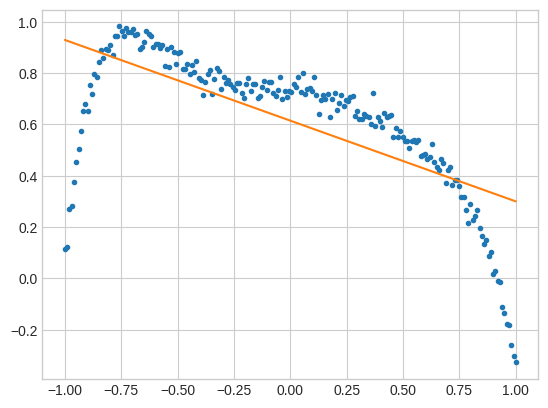

error is 7.590703262929241


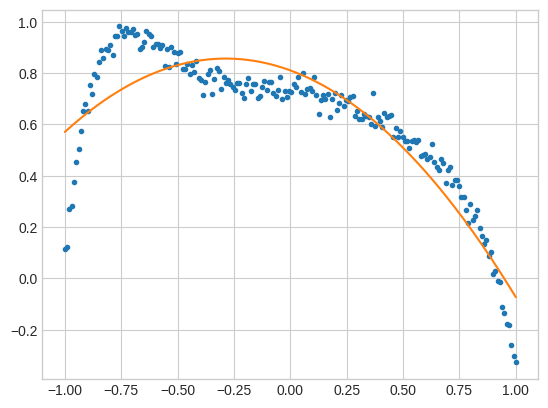

error is 2.6972864435292667


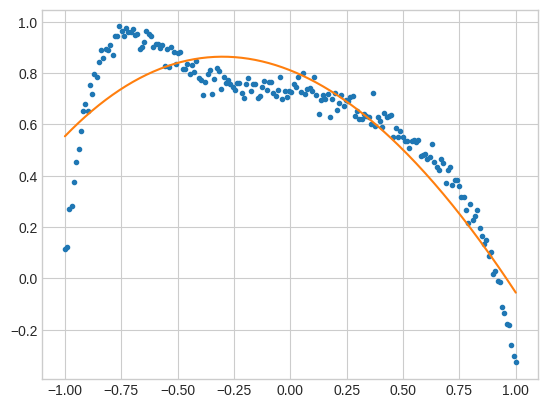

error is 2.7211972976278997


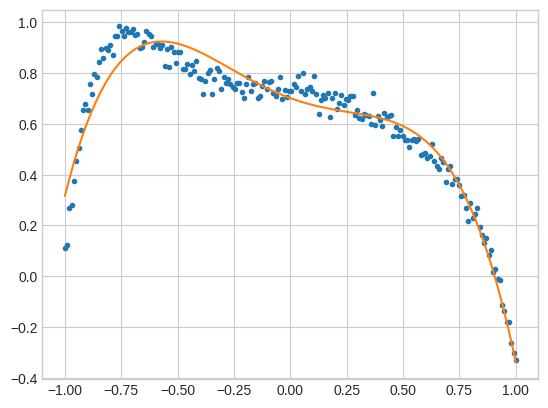

error is 0.839164288069397


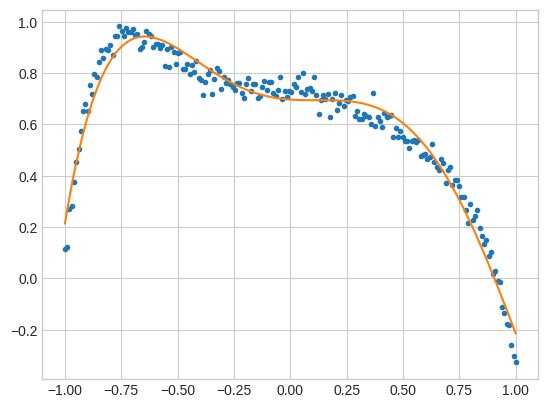

error is 0.5026912240944458


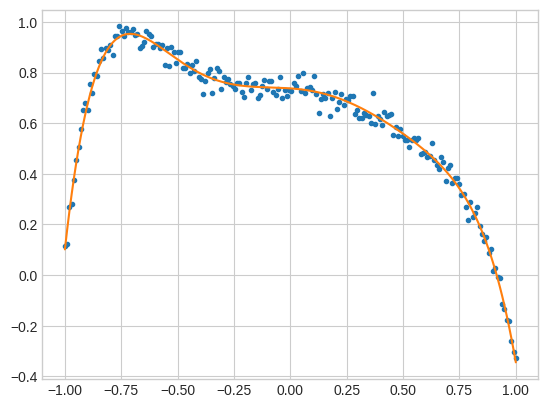

error is 0.1650255673379202


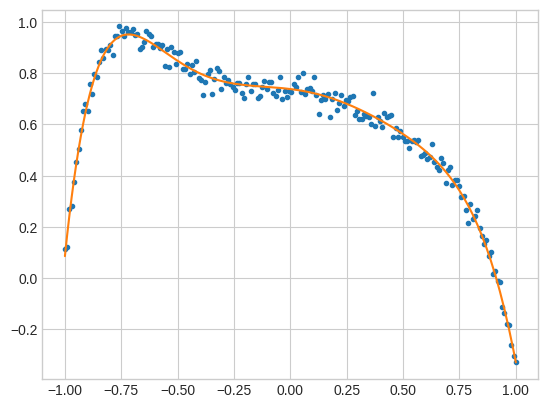

error is 0.1634294560745284


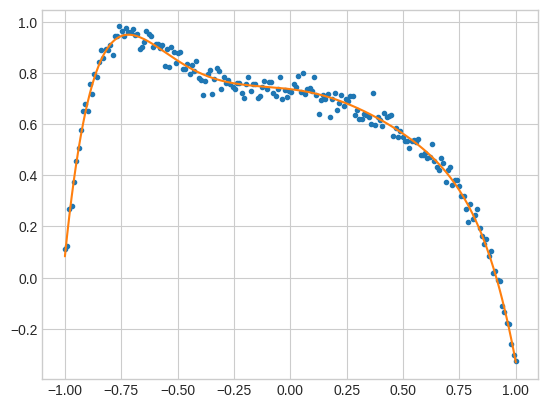

error is 0.16343880907640168


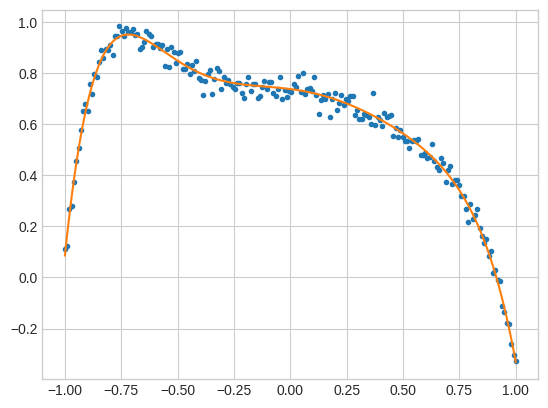

error is 0.1636208845871469


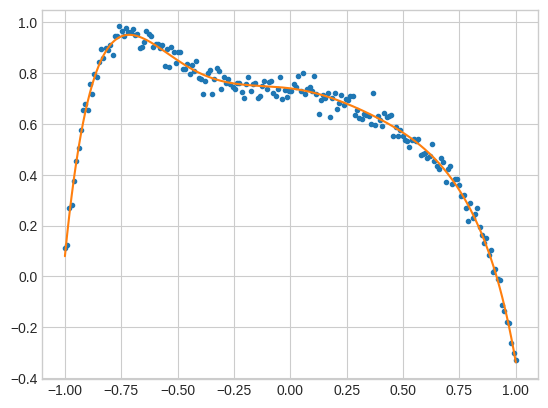

error is 0.1634052769182907
the min error is 0.1634052769182907, the min index is 10


In [17]:
from logging import ERROR
data_mat = np.genfromtxt('/content/sample_data/data_poly.csv',delimiter=',')
data_mat
np.random.seed(42)
V = np.random.choice(200, 50, replace=False)
T = np.setdiff1d(np.arange(0,200), V)
x = data_mat[:,0]
y = data_mat[:,1]
min = 400
min_index = 11
for k in range(1,11):
  Z = np.vander(x, increasing=True)[:,range(0,k+1)]
  w = la.lstsq(Z[T], y[T], rcond=None)[0]
  yw = Z@w
  plt.plot(x,y,'.')
  plt.plot(x,yw)
  plt.show()
  error = la.norm(Z@w - y)**2
  if min > error:
    min = error
    min_index = k
  print(f"error is {str(error)}")
print(f"the min error is {str(min)}, the min index is {str(min_index)}")

### EX.3

In [18]:
A = np.array([[1,1],
              [np.exp(1),np.exp(2)],
              [np.exp(2),np.exp(4)],
              [np.exp(3),np.exp(6)],
              [np.exp(4),np.exp(8)]])
b = np.array([0,1,4,9,16])

In [19]:
ans = la.lstsq(A, b, rcond=None)[0]
print(f"a = {ans[0]} \nb = {ans[1]}")

a = 0.5386417279156048 
b = -0.004497162512379686


In [20]:
error = la.norm(A@ans - b)**2
error

0.5415399562697947

In [21]:
def g(t):
  return ans[0]*np.exp(t) + ans[1]*np.exp(2*t)

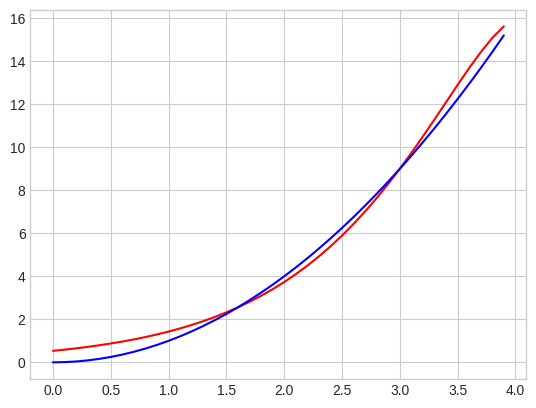

In [22]:
t1 = np.arange(0.0, 4.0, 0.1)
plt.plot(t1,g(t1),'r',t1,t1**2,'b')

In [23]:
A2 = np.array([[1,1,1],
              [np.exp(1),np.exp(2),1],
              [np.exp(2),np.exp(4),1],
              [np.exp(3),np.exp(6),1],
              [np.exp(4),np.exp(8),1]])

In [24]:
ans2= la.lstsq(A2, b, rcond=None)[0]
print(f"a = {ans2[0]} \nb = {ans2[1]} \nc = {ans2[2]}")

a = 0.5816502293171963 
b = -0.005146598358635174 
c = -0.43162399911888494


In [25]:
error2 = la.norm(A2@ans2 - b)**2
error2

0.2362847494463452

In [26]:
print(f"Improvement by {error-error2}")

Improvement by 0.3052552068234495


In [27]:
def g2(t):
  return ans2[0]*np.exp(t) + ans2[1]*np.exp(2*t) + ans2[2]

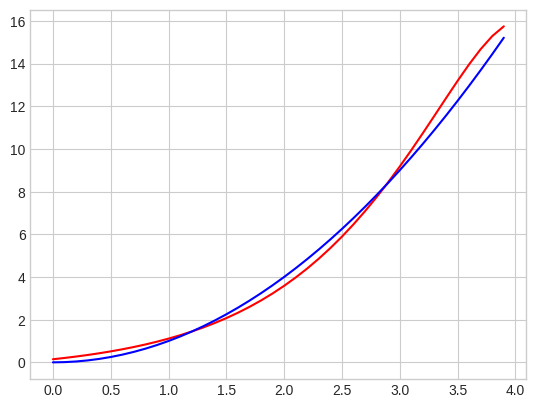

In [28]:
plt.plot(t1,g2(t1),'r',t1,t1**2,'b')